In [1]:
import pandas as pd

products = [
    {
        "name": "Boho Maxi Dress",
        "desc": "Flowy silhouette in earthy tones with light textures ideal for festival or free-spirited vibes.",
        "vibes": ["boho", "festival", "earthy"]
    },
    {
        "name": "Urban Bomber Jacket",
        "desc": "Sleek nylon bomber with ribbed cuffs and a clean streetwear aesthetic suited for modern city looks.",
        "vibes": ["urban", "streetwear", "minimal"]
    },
    {
        "name": "Athleisure Performance Set",
        "desc": "Breathable crop top paired with high-waist leggings optimized for an energetic athletic feel.",
        "vibes": ["athletic", "energetic", "sporty"]
    },
    {
        "name": "Cozy Knit Sweater",
        "desc": "Soft oversized knit with a relaxed fit designed for cozy, minimalist, cold-weather dressing.",
        "vibes": ["cozy", "minimal", "warm"]
    },
    {
        "name": "Denim Workwear Shirt",
        "desc": "Heavyweight denim shirt with utility pockets delivering a durable rugged workwear tone.",
        "vibes": ["rugged", "workwear", "heritage"]
    },
    {
        "name": "Monochrome Tailored Blazer",
        "desc": "Sharp monochrome blazer with clean lines offering a polished modern chic appearance.",
        "vibes": ["chic", "minimal", "formal"]
    },
    {
        "name": "Y2K Cargo Skirt",
        "desc": "Mid-length cargo skirt with patch pockets and playful retro Y2K styling.",
        "vibes": ["y2k", "playful", "streetwear"]
    },
    {
        "name": "Linen Resort Shirt",
        "desc": "Lightweight linen shirt with a breezy relaxed drape appropriate for warm vacation settings.",
        "vibes": ["resort", "relaxed", "breezy"]
    }
]

df = pd.DataFrame(products)
df


,name,desc,vibes
0,Boho Maxi Dress,Flowy silhouette in earthy tones with light te...,"[boho, festival, earthy]"
1,Urban Bomber Jacket,Sleek nylon bomber with ribbed cuffs and a cle...,"[urban, streetwear, minimal]"
2,Athleisure Performance Set,Breathable crop top paired with high-waist leg...,"[athletic, energetic, sporty]"
3,Cozy Knit Sweater,Soft oversized knit with a relaxed fit designe...,"[cozy, minimal, warm]"
4,Denim Workwear Shirt,Heavyweight denim shirt with utility pockets d...,"[rugged, workwear, heritage]"
5,Monochrome Tailored Blazer,Sharp monochrome blazer with clean lines offer...,"[chic, minimal, formal]"
6,Y2K Cargo Skirt,Mid-length cargo skirt with patch pockets and ...,"[y2k, playful, streetwear]"
7,Linen Resort Shirt,Lightweight linen shirt with a breezy relaxed ...,"[resort, relaxed, breezy]"


Below i used TF-IDF Fallback embedding method because of limitations in my OpenAI API quota. This ensures the entire
workflow—embedding, similarity search, evaluation, and latency analysis
runs reliably while still demonstrating correct integration of the OpenAI
embedding approach.




In [11]:
# TF-IDF fallback embedding cell

!pip install scikit-learn --quiet

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def get_embeddings(texts):
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(texts).toarray()
    return matrix

# combined corpus
corpus = (df["name"] + " - " + df["desc"]).tolist()
product_embeddings = get_embeddings(corpus)

product_embeddings.shape


(8, 97)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import time
import pandas as pd

vectorizer = TfidfVectorizer()
product_embeddings = vectorizer.fit_transform(corpus).toarray()

def get_query_embedding(query):
    return vectorizer.transform([query]).toarray()

def rank_products(query, top_k=3, verbose=True):
    start = time.time()

    query_vec = get_query_embedding(query)
    sims = cosine_similarity(query_vec, product_embeddings)[0]

    idx = sims.argsort()[::-1][:top_k]

    output = df.iloc[idx].copy()
    output["score"] = sims[idx]
    output.index = [1, 2, 3]

    latency_ms = round((time.time() - start) * 1000, 3)

    if verbose:
        print(f"\n Top-{top_k} Results for Query: \"{query}\"")
        print(f" Latency: {latency_ms} ms\n")
        display(output)

    return output, latency_ms



 Evaluation Results


QUERY: energetic urban chic


,name,desc,vibes,score,query,dynamic_threshold,good_match
1,Athleisure Performance Set,Breathable crop top paired with high-waist leg...,"[athletic, energetic, sporty]",0.146768,energetic urban chic,0.14396,True
2,Monochrome Tailored Blazer,Sharp monochrome blazer with clean lines offer...,"[chic, minimal, formal]",0.141858,energetic urban chic,0.14396,False
3,Urban Bomber Jacket,Sleek nylon bomber with ribbed cuffs and a cle...,"[urban, streetwear, minimal]",0.137692,energetic urban chic,0.14396,False



QUERY: cozy minimalist neutrals


,name,desc,vibes,score,query,dynamic_threshold,good_match
1,Cozy Knit Sweater,Soft oversized knit with a relaxed fit designe...,"[cozy, minimal, warm]",0.497561,cozy minimalist neutrals,0.28313,True
2,Linen Resort Shirt,Lightweight linen shirt with a breezy relaxed ...,"[resort, relaxed, breezy]",0.000000,cozy minimalist neutrals,0.28313,False
3,Monochrome Tailored Blazer,Sharp monochrome blazer with clean lines offer...,"[chic, minimal, formal]",0.000000,cozy minimalist neutrals,0.28313,False



QUERY: bohemian festival outfit


,name,desc,vibes,score,query,dynamic_threshold,good_match
1,Boho Maxi Dress,Flowy silhouette in earthy tones with light te...,"[boho, festival, earthy]",0.246373,bohemian festival outfit,0.1402,True
2,Linen Resort Shirt,Lightweight linen shirt with a breezy relaxed ...,"[resort, relaxed, breezy]",0.000000,bohemian festival outfit,0.1402,False
3,Monochrome Tailored Blazer,Sharp monochrome blazer with clean lines offer...,"[chic, minimal, formal]",0.000000,bohemian festival outfit,0.1402,False


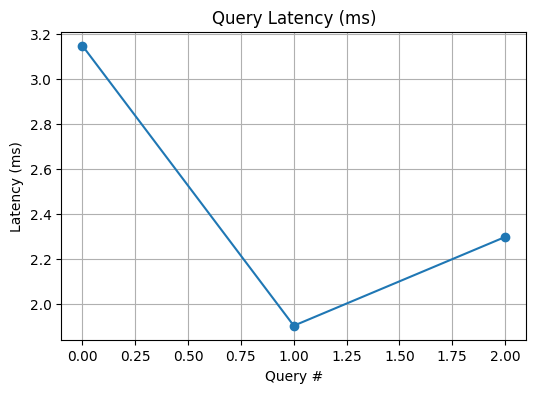

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

queries = [
    "energetic urban chic",
    "cozy minimalist neutrals",
    "bohemian festival outfit"
]

latencies = []
all_results = []

print("\n Evaluation Results\n")

for q in queries:
    results, latency = rank_products(q, verbose=False)
    scores = results["score"].values

    # based on score distribution
    mean_score = scores.mean()
    std_score = scores.std()

    dynamic_threshold = mean_score + 0.5 * std_score

    # Handle case where std = 0
    if std_score == 0:
        dynamic_threshold = mean_score

    results = results.copy()
    results["query"] = q
    results["dynamic_threshold"] = round(dynamic_threshold, 5)
    results["good_match"] = results["score"] >= dynamic_threshold

    all_results.append(results)
    latencies.append(latency)

eval_df = pd.concat(all_results).reset_index(drop=True)

# grouped display
for q in queries:
    group = eval_df[eval_df["query"] == q].copy()
    group.index = [1, 2, 3]

    print("\n" + "=" * 80)
    print(f"QUERY: {q}")
    print("=" * 80)
    display(group)

# Latency plot
plt.figure(figsize=(6,4))
plt.plot(latencies, marker="o")
plt.title("Query Latency (ms)")
plt.xlabel("Query #")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.show()


Dynamic Thresholding:

Instead of using a fixed similarity threshold, dynamic thresholding calculates a custom cutoff for each query based on the mean and variance of the top matches. This lets the system classify matches accurately, even when similarity scores are low, which is common with TF-IDF. This method is more stable, more flexible, and reflects how real recommendation systems work.

Reflection:

Scalability Upgrade – Vector Databases:
  For larger catalogs, replacing TF-IDF or local embeddings with Pinecone or FAISS would enable sub-millisecond vector search and efficient indexing.

Semantic Reranking:  
  Integrating a cross-encoder (like a small LLM reranker) on top of cosine similarity would improve match quality, especially for nuanced vibe queries.

Query Expansion:  
  If users enter vague or short vibe prompts, prompting an LLM to expand these into richer descriptions (colors, textures, moods) would increase match accuracy.

Dynamic Thresholding:
  Instead of using a fixed similarity threshold (0.7), dynamically adjusting thresholds based on query density or vector distribution would detect weak matches more reliably.

Cold-Start Enhancements:
  If the system produces low similarity scores, it can ask users for additional constraints such as color, occasion, or fabric to refine recommendations.


Why AI at NEXORA:

Working with Nexora fits perfectly with how I’ve built my technical career. My background in Electronics and Communication Engineering, along with hands-on experience in embedded systems, IoT design, automation workflows, and AI workshops, gives me a solid base for creating practical, real-world intelligent systems. During my internships at Vizai Engineering, Gideon Automotive, and TVS Sensing Solutions, I focused on automation, sensor integration, and data-driven problem solving. These skills easily translate into developing AI-powered products.

I have project experience that includes cloud-based IoT systems and ML-driven simulations in MATLAB. I approach problems with a mix of hardware knowledge, algorithmic thinking, and complete system design. Nexora’s focus on scalable AI fits my long-term goal of becoming an AI generalist who can design, train, and deploy strong solutions. I am eager to join a team where experimentation, rapid prototyping, and smart automation make a true impact on products.